<a href="https://colab.research.google.com/github/FGalvao77/Rede-Neural-Artificial-RNA-usando-Breast-Cancer-Dataset/blob/main/Rede_Neural_Artificial_usando_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo câncer de mama com RNA (rede neural artificial) usando o dataset _load_breast_cancer_**

---

O câncer de mama é uma doença causada pela multiplicação desordenada de células anormais da mama, que forma um tumor com potencial de invadir outros órgãos. Há vários tipos de câncer de mama. Alguns têm desenvolvimento rápido, enquanto outros crescem lentamente.

fonte: [**INCA** - Instituto Nacional de Câncer](https://bit.ly/3uXihCb)

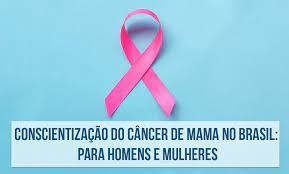

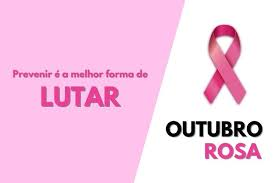

# <font color='green'>**Rede Neural Artificial (RNA) usando Breast Cancer Dataset**</font>

---
- https://www.analyticsvidhya.com/blog/2021/06/artificial-neural-network-using-breast-cancer-dataset/



**``Introdução``**

Neste artigo, aprenderemos umas das técnicas de aprendizado profundo usadas para encontrar a precisão de um conjunto de dados do câncer de mama, mas sei que a maioria das pessoas não sabe do que estou falando. Portanto começaremos do fundamental e posteriormente passaremos ao nosso tópico principal - aplicação de uma rede neural. 

Em primeiro lugar, faremos um breve introdução do aprendizado profundo.



 **``O que é Rede Neural Artificial?``**
 
Como o nome sugere rede neural artificial, é a rede de neurônios artificiais. Refere-se a um modelo inspirado biologicamente a partir do cérebro humano.  Podemos dizer que uma rede neural artificial geralmente é uma rede computacional baseada em redes neurais biológicas que constroem a estrutura do cérebro humano. 

Todos sabem que os neurônios estão interligados entre si em nossos cérebros e a transmissão de processo de dados se dá por essas conexões. 

Portanto uma rede neural artificial é semelhante aos neurônios do cérebro humano que estão interconectados entre si, que consiste em um grande número de neurônios artificiais, que são denominados unidades organizadas em uma sequência de camadas, tendo as várias camadas de neurônios e formando uma rede completa. Esses neurônios são denominados de ``nós``.

É composto por três camadas, que são:
- Camada de entrada
- Camada oculta
- Camada de saída

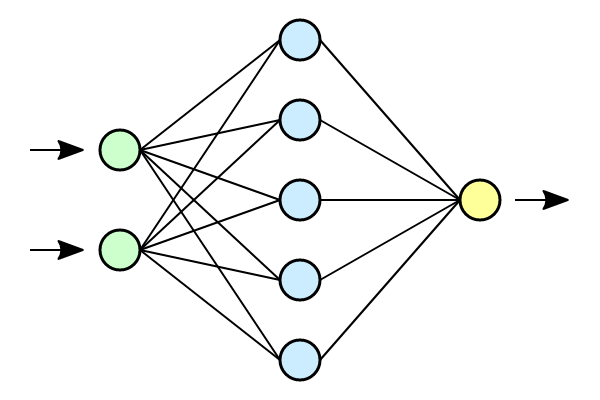

**``O que é aprendizado profundo?``**

Se falarmos sobre aprendizado profundo, simplesmente entenda que é um subconjunto ou subparte do aprendizado de máquina. Podemos dizer que o aprendizado profundo é uma função de IA que imita o cérebro humano e processa esses dados e cria padrões para uso na tomada de decisões.

Aprendizado profundo é o tipo de aprendizado de máquina semelhante ao cérebro humano. Ele usa uma estrutura de várias camadas de algoritmos chamados de redes neurais. Seus algoritmos tentam copiar os dados que humanos estariam analisando com uma determinada estrutura lógica. Também é conhecido como um sistema neural profundo rede ou aprendizado neural profundo.



**``Criando RNA usando o conjunto de dados do câncer de mama``**

Agora vamos ao nosso tópico principal, para isso utilizaremos o conjunto de dados e, em seguida, criaremos a rede neural artificial e classificar o diagnóstico.

Agora importaremos as bibliotecas necessárias para tratamento dos dados e visualização.

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Para questão mais didática, irei importar o conjunto de dados diretamente do ``sklearn``.

In [ ]:
# importando os dados e carregando-o na variável "df"
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

# visualizando as informações sobre o conjunto de dados
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# visualizando as instâncias presentes na nossa variável alvo
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# df['target_names']

Agora por questões de praticidade, iremos baixar o conjunto de dados de câncer de mama através do link abaixo.

E em seguida carrega-lo para o ambiente do google colab.

- Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
# instanciando o conjunto de dados na variável "data"
data = pd.read_csv('/content/breast_cancer.csv')

# visualizando as 5 primeiras linhas
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# quantidade de linhas e colunas
data.shape

(569, 33)

In [ ]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# visualizando as instâncias e a frequência absoluta da variável alvo
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# frequência relativa
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# data['diagnosis'][:1]

In [ ]:
data['diagnosis'].value_counts()[0], data['diagnosis'].value_counts()[1]

(357, 212)

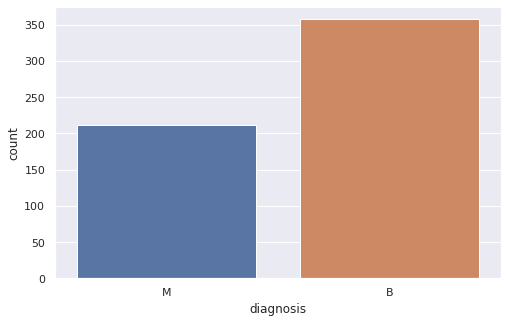

In [ ]:
# plotando gráfica da distriubuição das instâncias da variável alvo
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
ax = sns.countplot(x=data['diagnosis'], data=data)

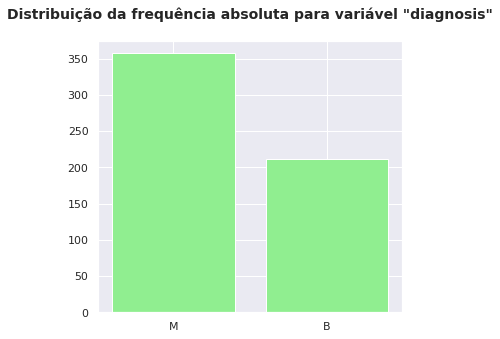

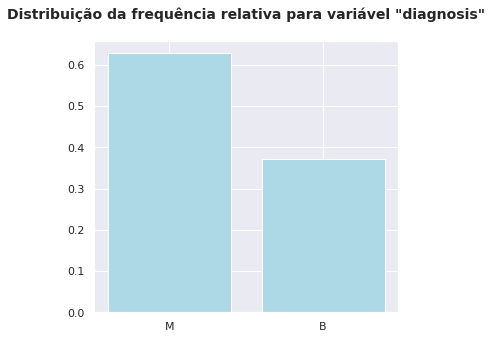

In [ ]:
# plotando gráficos das distribuições absoluta e relativa da coluna "famsize"
plt.figure(figsize=[12,5])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.bar(data['diagnosis'].unique(), data['diagnosis'].value_counts(), color = 'lightgreen')
plt.title('Distribuição da frequência absoluta para variável "diagnosis"\n', 
          {'fontsize': 14,'fontweight': 'bold'})
plt.show();

print('\n\n')

plt.figure(figsize=[12,5])
plt.subplot(1,2,2)
plt.bar(data['diagnosis'].unique(), data['diagnosis'].value_counts(normalize=True), color = 'lightblue')
plt.title('Distribuição da frequência relativa para variável "diagnosis"\n', 
          {'fontsize': 14,'fontweight': 'bold'})
plt.show();

No conjunto de dados, temos que verificar se os valores nulos que estão presentes nas variáveis ​​para as quais usamos pandas.

In [ ]:
# verificando se há valores nulos e/ou faltantes
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

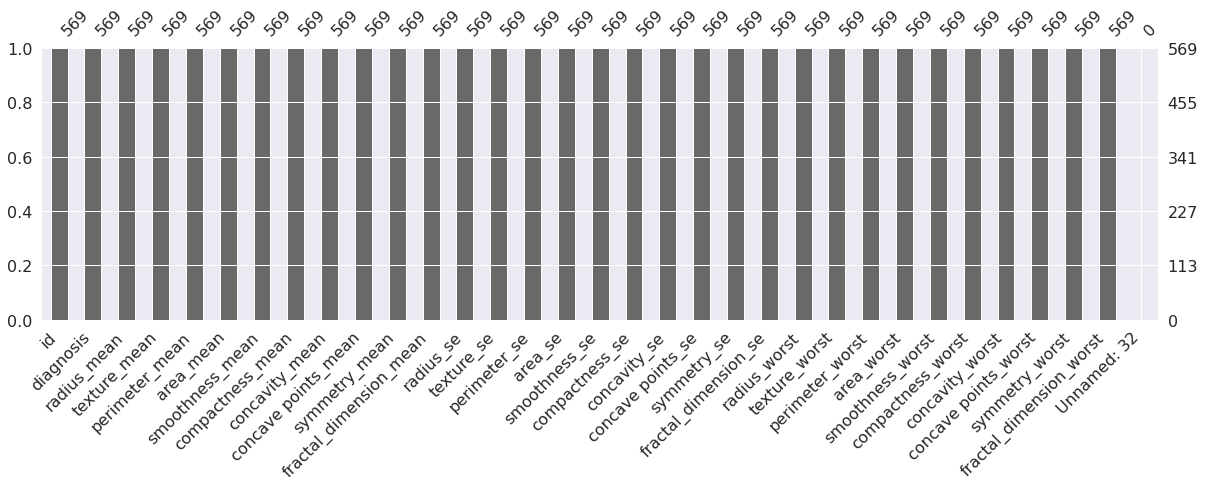

In [ ]:
# importando a biblioteca "missingno" para visualizar de forma gráfica valores ausentes
import missingno as msno

# plotando gráfico de barras com a biblioteca "missingno" e juntamente com a função ".bar()"
# onde iremos contabilizar os valores nulos e exibí-los de forma gráfica
msno.bar(data, figsize=(20, 5));

> Podemos visualizar que a coluna ``Unnamed: 32`` contém todos os
valores nulos, portanto, excluímos essa coluna.

In [ ]:
# eliminando a coluna
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [ ]:
# verificando novamente se há valores nulos e/ou faltantes
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> Podemos ver que a coluna `Unnamed: 32` foi removida.

**Variáveis ​​independentes e dependentes**

---
Agora iremos dividir o conjunto de dados em variáveis ​​independentes e dependentes, para isso criamos dois
variáveis ​​um representa independente e o outro representa dependente.


In [ ]:
# variável independente
X = data.drop('diagnosis', axis=1)

# variável dependente
y = data.diagnosis

In [ ]:
# visualizando a(s) dimensão(es) das variáves - independente e dependente
X.shape, y.shape

((569, 30), (569,))

In [ ]:
# visualizando as 10 primeiras linhas da variável independente
X[:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# visualizando as colunas da variável independente
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# visualizando as 10 primeiras linhas da variável dependente
y[:10]

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

**Lidando com valor categórico**

---


Quando imprimimos a variável dependente ``y``, vemos que ela contém dados categóricos e, portanto temos que realizar um tratamento desses dados em transforma-los em formato binário para um processo posterior, e para isso usamos do **Scikit learn** a função ``Label Encoder`` para codificação dos dados categóricos.

In [ ]:
# importando a biblioteca
from sklearn.preprocessing import LabelEncoder

# instanciando o objeto
enc = LabelEncoder()

In [ ]:
# aplicando o tratamento dos dados na variável alvo - dependente
y = enc.fit_transform(y)

In [ ]:
# visualizando se o tratamento foi executado corretamente
y[15:25]  # do índice 15 até o 25

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

**Dividindo Dados**

---

Agora iremos dividir os dados em partes de treinamento e teste.

In [ ]:
# importando a biblioteca
from sklearn.model_selection import train_test_split

In [ ]:
# realizando a divisão das variáveis - independente e dependente em cada uma com partes para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=40)

In [ ]:
# visualizando a(s) dimensão(es) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

**Dimensionando os dados**

---


Quando criamos a rede neural artificial, temos que dimensionar os dados em números menores porque o algoritmo de aprendizado profundo multiplica os pesos e os dados de entrada dos ``nós`` e leva muito tempo, então para reduzir esse tempo, dimensionamos os dados.

Para escalar, usamos o módulo scikit learn ``StandardScaler``, escalamos o conjunto de dados de treinamento e teste.

In [ ]:
# importando a bblioteca
from sklearn.preprocessing import StandardScaler

# instanciando o objeto
std = StandardScaler()

In [ ]:
# aplicando o escalamento das variáveis - X_train e X_test
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

A partir daqui, começamos a criar a rede neural artificial, para isso importamos as bibliotecas importantes que são
usado para criar ANN.

In [ ]:
# importando as bibliotecas
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

**Criação das camadas**

---


Depois de importar essas bibliotecas, criaremos três tipos de camadas:
- Camada de entrada;
- Camada oculta e,
- Camada de saída

Primeiro criamos o modelo.

In [ ]:
# instanciando o objeto
classifier = Sequential()

Um modelo sequencial é apropriado para uma pilha simples de camadas, onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

Agora criamos as camadas da rede neural.

In [ ]:
# definindo nossa RNA

# camada de entrada
classifier.add(Dense(units=12, kernel_initializer='he_uniform', 
               activation='relu', input_dim=30))

# camada oculta
classifier.add(Dense(units=12, kernel_initializer='he_uniform', 
               activation='relu'))

# camada de saída
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', 
               activation='sigmoid'))

> No código acima, o método Dense é usado para criar as camadas, e em seguida passamos os parâmetros fundamentais. 
- O primeiro parâmetro são ``nós`` de saída, o segundo é o ``inicializador`` para a matriz de pesos do kernel, o terceiro é a ``função de ativação`` e o último parâmetro são ``nós de entrada ``ou o número de independentes recursos.

Depois de executar este código, obtemos o resumo dele usando.

In [ ]:
# visualizando o sumário da RNA
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


**Compilando ANN**

---


Agora iremos compilar nosso modelo com o otimizador.

In [ ]:
# compilando os parâmetros do classificador
classifier.compile(optimizer='adam', loss='binary_crossentropy', 
                   metrics=['accuracy'])

**Ajustando a ANN aos dados de treinamento**

---


Depois de compilar o modelo, temos que ajustar a RNA nos dados de treinamento para a previsão.

In [ ]:
# aplicando o treinamento da RNA
model = classifier.fit(X_train_scaled, y_train, batch_size=100, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.6718 - accuracy: 0.6884
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.7186
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7513
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7864
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8216
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8342
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8518
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8719
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8844
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8995
Epoch 11/100
4/4 [===========

O método ``fit()`` ajusta a RNA aos dados de treinamento, nos parâmetros definimos os valores específicos de cada variável como batch_size, epochs, etc. 

Por fim, encontramos uma pontuação de precisão excelente, então nosso modelo começou perfeitamente em dados de treinamento.

Após os dados de treinamento, temos que testar a pontuação de precisão para os dados de teste também, vamos ver abaixo.

In [ ]:
# aplicando o classificador nos dados de teste e realizando as predições
y_pred = classifier(X_test_scaled)

# visualizando as 10 primeiras predições do classificador
y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.1604130e-03],
       [9.8045969e-01],
       [2.1451712e-04],
       [1.9226730e-02],
       [9.9970311e-01],
       [7.0526451e-02],
       [1.6695112e-02],
       [3.0001074e-02],
       [1.7910537e-01],
       [2.4887919e-04]], dtype=float32)>

In [ ]:
 # aplicando uma "linha de corte" nas predições e definindo uma classificação booleana para os mesmos
 y_pred = (y_pred > 0.5)  # valores maiores que 50%

 # visualizando as 10 primeiras predições
 print(y_pred[:10]) # dado condição definida acima retorna - True (verdadeiro) ou False (falso)

tf.Tensor(
[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]], shape=(10, 1), dtype=bool)


In [ ]:
# importando as bibliotecas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# instanciando a matriz com os dados de teste (y_test) e as predições realizadas (y_pred)
cm = confusion_matrix(y_test, y_pred)

# instanciando o score com os dados de teste (y_test) e as predições realizadas (y_pred)
score = accuracy_score(y_test, y_pred)

In [ ]:
# visualizando a matriz de confusão
print(cm) 

# visualizando o score
print('\nScore:',score)

[[114   1]
 [  2  54]]

Score: 0.9824561403508771


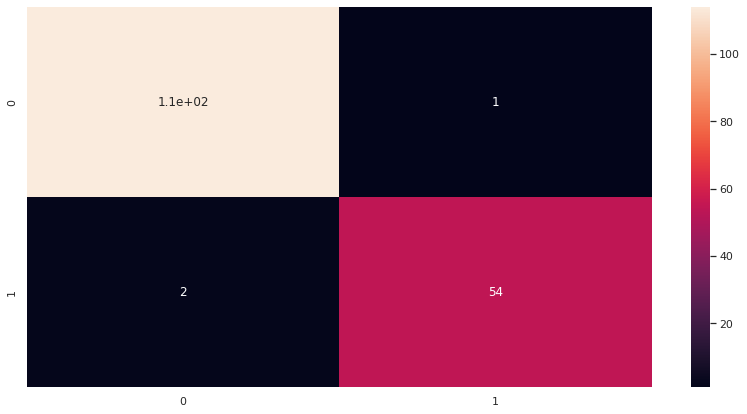

In [ ]:
# plotando a matriz de confusão
plt.figure(figsize=[14,7]) 
sns.heatmap(cm, annot=True) 
plt.show();

In [ ]:
# visualizando as métricas utilizadas no modelo
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


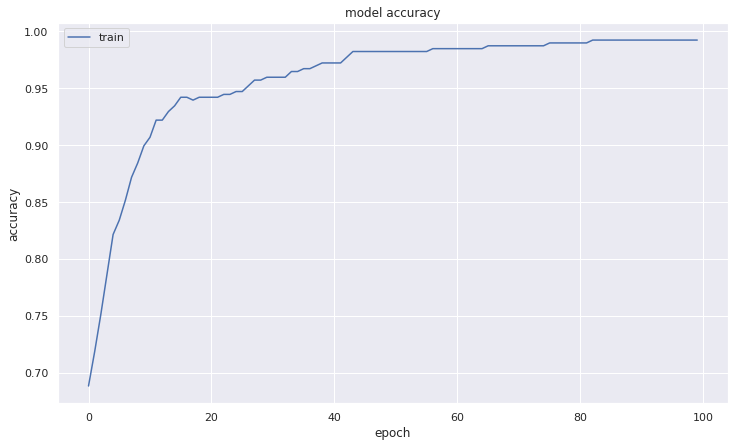

In [ ]:
# plotando a acurácia do modelo
plt.figure(figsize=[12,7])
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

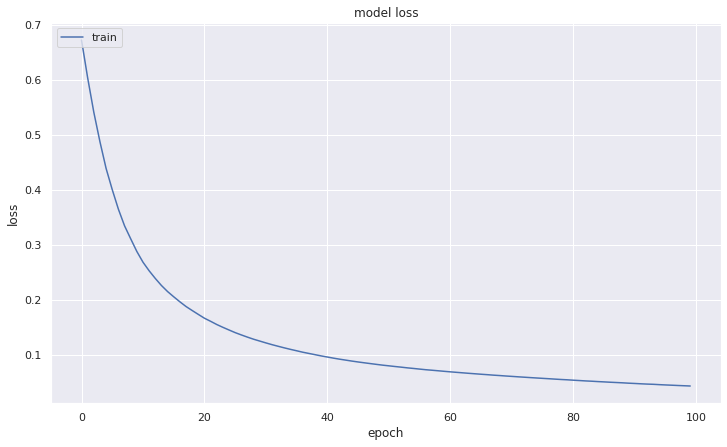

In [ ]:
# plotando a perda do modelo
plt.figure(figsize=[12,7])
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

In [ ]:
# salvando o modelo
classifier.save('File_name.h5')